- Features of the following Code:
  - **Loading the Data**: Load Data to manipulate scenarios across multiple areas as needed. 


In [2]:
# Import the necessary library
import pandas as pd

# Define the exact file path
file_path = r"C:\Users\louro\Documents\2-Louies Daily Documents\Math and Science\Python\Airline Pilot Project\Pilot_Performance_Dataset.csv"

# Try loading the file
try:
    # Read the CSV file
    data = pd.read_csv(file_path)
    print("File loaded successfully!")

    # Display the first few rows
    print(data.head())
except FileNotFoundError:
    print("Error: File not found. Please check the file path and ensure the file exists.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


File loaded successfully!
   Pilot ID          Scenario              Cockpit Item  Reaction Time (s)  \
0         1  Light Turbulence    Primary Flight Display               4.35   
1         1  Light Turbulence    Multi-Function Display               1.64   
2         1  Light Turbulence  Flight Management System               1.96   
3         1  Light Turbulence          Autopilot System               4.66   
4         1  Light Turbulence        Navigation Systems               4.26   

  Correct Action?  Blood Pressure (systolic)  Blood Pressure (diastolic)  \
0             Yes                     156.96                       84.86   
1             Yes                     156.96                       84.86   
2             Yes                     156.96                       84.86   
3             Yes                     156.96                       84.86   
4             Yes                     156.96                       84.86   

   Heart Rate  Oxygen Saturation  Tremor Intensi

- Features of the Folowing Code:
  - **Histogram**: Analyze the distribution of reaction times.
  - **Bar Graph**: Compare average reaction times across scenarios.
  - **Correct Action Percentage**: Measure pilot accuracy across scenarios.
  - **Correlation Heatmap**: Explore relationships between physiological metrics (e.g., heart rate, oxygen saturation).



Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11050 entries, 0 to 11049
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pilot ID                    11050 non-null  int64  
 1   Scenario                    11050 non-null  object 
 2   Cockpit Item                11050 non-null  object 
 3   Reaction Time (s)           11050 non-null  float64
 4   Correct Action?             11050 non-null  object 
 5   Blood Pressure (systolic)   11050 non-null  float64
 6   Blood Pressure (diastolic)  11050 non-null  float64
 7   Heart Rate                  11050 non-null  float64
 8   Oxygen Saturation           11050 non-null  float64
 9   Tremor Intensity            11050 non-null  float64
 10  Perspiration                11050 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 949.7+ KB
None

Statistical Summary:
           Pilot ID  Reaction Time (s)  B

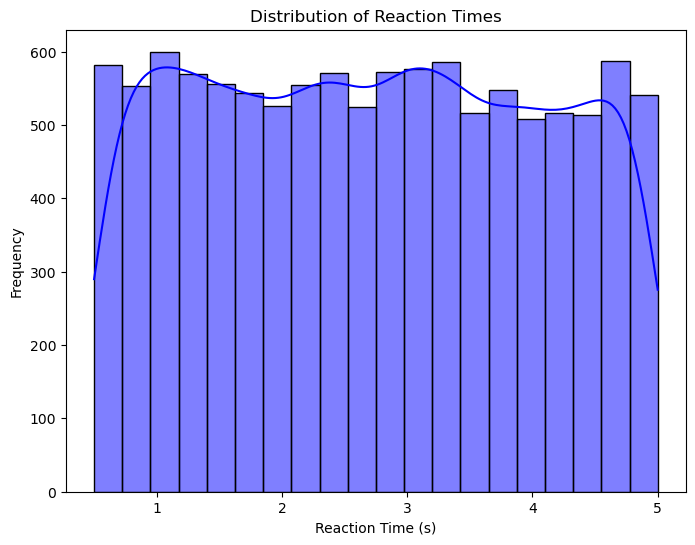

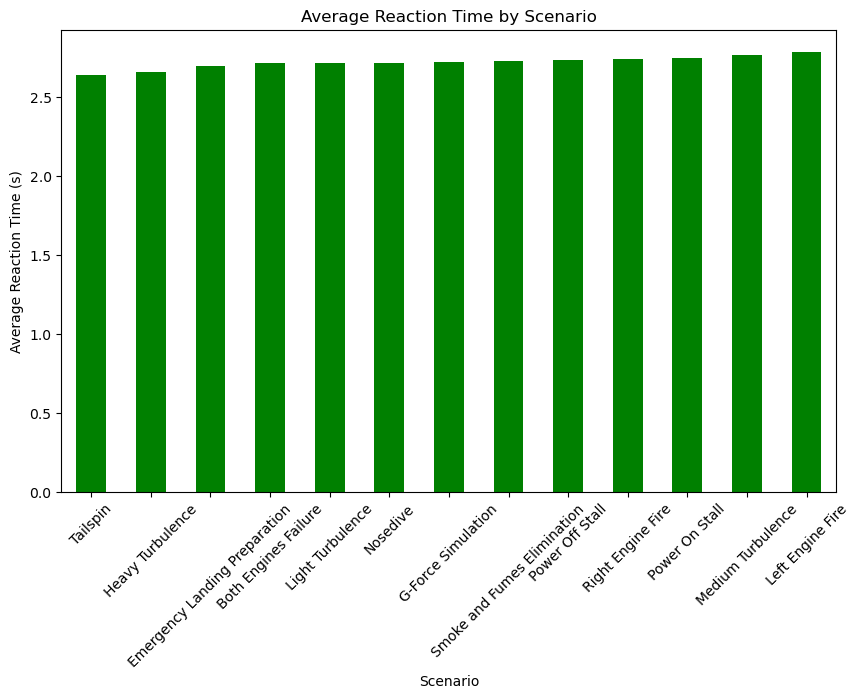

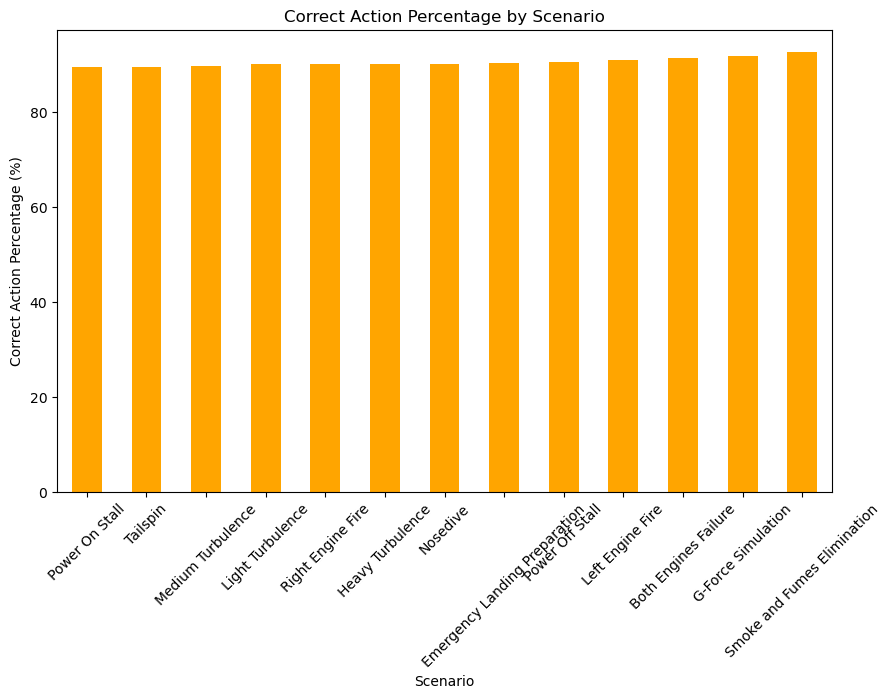

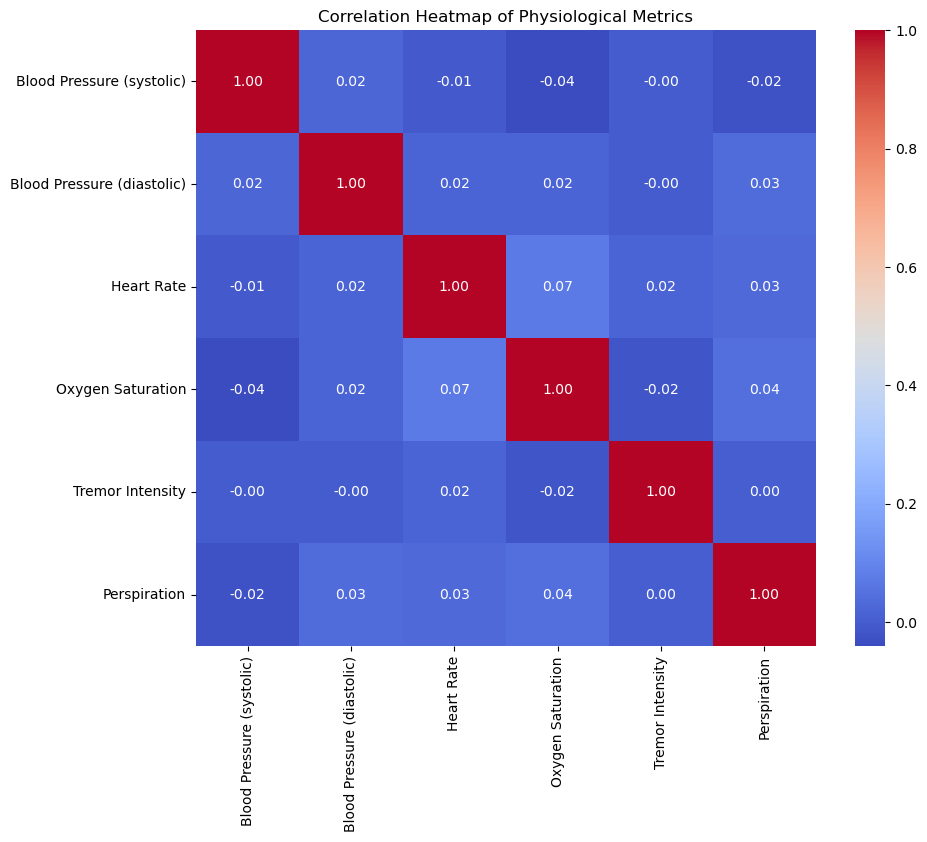

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Quick summary of the dataset
print("\nDataset Summary:")
print(data.info())
print("\nStatistical Summary:")
print(data.describe())

# 2. Distribution of reaction times
plt.figure(figsize=(8, 6))
sns.histplot(data['Reaction Time (s)'], kde=True, bins=20, color='blue')
plt.title("Distribution of Reaction Times")
plt.xlabel("Reaction Time (s)")
plt.ylabel("Frequency")
plt.show()

# 3. Average reaction time by scenario
if 'Scenario' in data.columns and 'Reaction Time (s)' in data.columns:
    plt.figure(figsize=(10, 6))
    avg_reaction_time = data.groupby('Scenario')['Reaction Time (s)'].mean().sort_values()
    avg_reaction_time.plot(kind='bar', color='green')
    plt.title("Average Reaction Time by Scenario")
    plt.xlabel("Scenario")
    plt.ylabel("Average Reaction Time (s)")
    plt.xticks(rotation=45)
    plt.show()

# 4. Correct action percentages by scenario
if 'Scenario' in data.columns and 'Correct Action?' in data.columns:
    correct_action_rate = (
        data.groupby('Scenario')['Correct Action?']
        .apply(lambda x: (x == "Yes").mean() * 100)
        .sort_values()
    )
    plt.figure(figsize=(10, 6))
    correct_action_rate.plot(kind='bar', color='orange')
    plt.title("Correct Action Percentage by Scenario")
    plt.xlabel("Scenario")
    plt.ylabel("Correct Action Percentage (%)")
    plt.xticks(rotation=45)
    plt.show()

# 5. Correlation heatmap for physiological data
physiological_columns = [
    'Blood Pressure (systolic)',
    'Blood Pressure (diastolic)',
    'Heart Rate',
    'Oxygen Saturation',
    'Tremor Intensity',
    'Perspiration',
]
if all(col in data.columns for col in physiological_columns):
    plt.figure(figsize=(10, 8))
    sns.heatmap(data[physiological_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap of Physiological Metrics")
    plt.show()

